In [108]:
# Python Project Template

# 1. Prepare Problem 

# a) Load libraries 
# b) Load dataset

# 2. Summarize Data

# a) Descriptive statistics 
# b) Data visualizations

# 3. Prepare Data 

# a) Data Cleaning 
# b) Feature Selection 
# c) Data Transforms

# 4. Evaluate Algorithms

# a) Split-out validation dataset 
# b) Test options and evaluation metric
# c) Spot Check Algorithms 
# d) Compare Algorithms

# 5. Improve Accuracy

# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model

# a) Predictions on validation dataset 
# b) Create standalone model on entire training dataset 
# c) Save model for later use

# 1. Prepare Problem 

In [109]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


In [110]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv("F:\ML_Proj_collection\ML_proj2_regression\BostonHousing.csv")

# 2. Summarize Data

In [111]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2
5,2.99e-02,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222,18.7,394.12,5.21,28.7
6,8.83e-02,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311,15.2,395.60,12.43,22.9
7,1.45e-01,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311,15.2,396.90,19.15,27.1
8,2.11e-01,12.5,7.87,0,0.52,5.63,100.0,6.08,5,311,15.2,386.63,29.93,16.5
9,1.70e-01,12.5,7.87,0,0.52,6.00,85.9,6.59,5,311,15.2,386.71,17.10,18.9


In [112]:
df.shape

(506, 14)

In [113]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [114]:
set_option('precision',1)
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [115]:
# correlation

set_option('precision',2)
df.corr(method='pearson')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


This is interesting. We can see that many of the attributes have a strong correlation (e.g. > 0.70 or < −0.70). For example:  NOX and INDUS with 0.77.
 DIS and INDUS with -0.71.
 TAX and INDUS with 0.72.
 AGE and NOX with 0.73.
 DIS and NOX with -0.78.
It also looks like LSTAT has a good negative correlation with the output variable MEDV with a value of -0.74.


## Data Visualizations

### Unimodal Data Visualizations

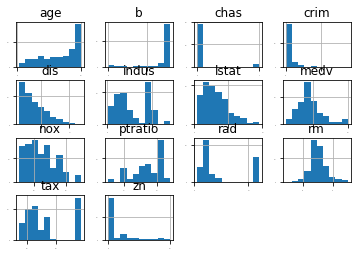

In [116]:
# histograms

df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

We can see that some attributes may have an exponential distribution, such as CRIM, ZN, AGE and B. We can see that others may have a bimodal distribution such as RAD and TAX.

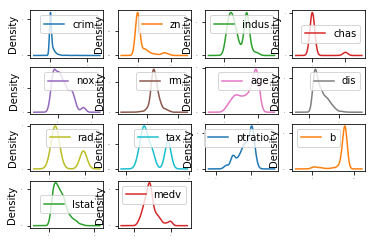

In [117]:
# density

df.plot(kind='density',subplots=True,layout=(4,4),sharex=False,legend=True,fontsize=1)
plt.show()

This perhaps adds more evidence to our suspicion about possible exponential and bimodal distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.

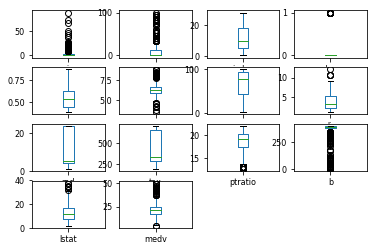

In [118]:
# box and whisker plots

df.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,fontsize=8)
plt.show()

This helps point out the skew in many distributions so much so that data looks like outliers (e.g. beyond the whisker of the plots).

### Multimodal Data Visualizations

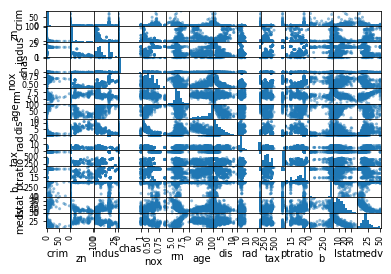

In [119]:
# scatter plot matri

scatter_matrix(df)
plt.show()

We can see that some of the higher correlated attributes do show good structure in their relationship. Not linear, but nice predictable curved relationships.

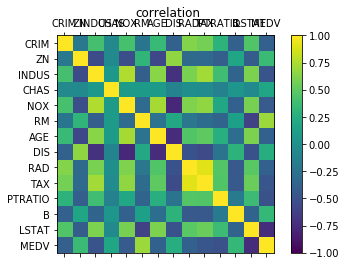

In [120]:
# correlation matrix

fig=plt.figure()
plt.suptitle('correlation')
ax=fig.add_subplot(111)
cax=ax.matshow(df.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)

ticks=np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()


The dark yello color shows positive correlation whereas the dark blue color shows negative correlation. We can also see some dark yello and dark blue that suggest candidates for removal to better improve accuracy of models later on.

### Evaluate Algorithms

In [121]:
# Split-out validation dataset

array = df.values 
X = array[:,0:13] 
Y = array[:,13] 

validation_size = 0.20 
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [122]:
# Test options and evaluation metric

num_folds = 10 
seed = 7
scoring = 'neg_mean_squared_error'

In [123]:
# Spot-Check Algorithms 

models = []
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))



In [124]:
# evaluate each model in turn

results = [] 
names = [] 

for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg =(name, cv_results.mean(), cv_results.std()) 
    print(msg)


('LR', -21.3798557266787, 9.414263656984748)
('LASSO', -26.423561108409654, 11.651109915777916)
('EN', -27.50225935066171, 12.305022264112704)
('KNN', -41.89648839024391, 13.901688149849864)
('CART', -26.55569756097561, 12.831554028263447)
('SVR', -85.51834183929131, 31.99479823184288)


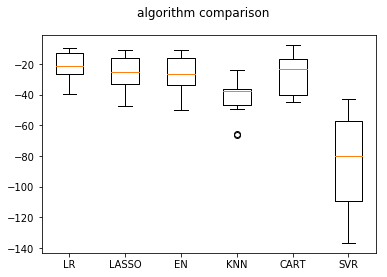

In [125]:
# Compare Algorithms

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see similar distributions for the regression algorithms and perhaps a tighter distribution of scores for CART.The diﬀering scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN. In the next section we will look at running the same algorithms using a standardized copy of the data.


### Evaluate Algorithms: Standardization

In [126]:
# Standardize the dataset
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())]))) 
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())]))) 
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

results=[]
names=[]

for name,model in pipelines:
    kfold=KFold(n_splits=10,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=(name,cv_results.mean(),cv_results.std())
    print(msg)

('ScaledLR', -21.379855726678567, 9.414263656984708)
('ScaledLASSO', -26.607313557676616, 8.978761485890264)
('ScaledEN', -27.932372158135518, 10.587490490139404)
('ScaledKNN', -20.107620487804876, 12.376949150820472)
('ScaledCART', -24.865676219512192, 7.8435002859015635)
('ScaledSVR', -29.633085500303213, 17.009186052351556)


Running the example provides a list of mean squared errors. We can see that scaling did have an eﬀect on KNN, driving the error lower than the other models.

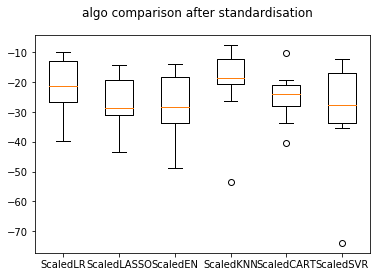

In [127]:
# Compare Algorithms

fig=plt.figure()
plt.suptitle('algo comparison after standardisation')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that KNN has both a tight distribution of error and has the lowest score.

### Improve Results With Tuning

We know from the results in the previous section that KNN achieves good results on a scaled version of the dataset. But can it do better. The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of diﬀerent numbers of neighbors and see if we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset.

In [128]:
# KNN Algorithm tuning

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21]) 
param_grid = dict(n_neighbors=k_values) 
model = KNeighborsRegressor() 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)

print(grid_result.best_score_,grid_result.best_params_)

mean=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,std,params in zip(mean,std,params):
    print(mean,std,params)

-18.172136963696367 {'n_neighbors': 3}
-20.208663366336634 15.029651571426534 {'n_neighbors': 1}
-18.172136963696367 12.950569939457809 {'n_neighbors': 3}
-20.131163366336633 12.203696929311104 {'n_neighbors': 5}
-20.575845120226305 12.345886317622917 {'n_neighbors': 7}
-20.368263659699302 11.621737918716054 {'n_neighbors': 9}
-21.009204238605676 11.610012219014179 {'n_neighbors': 11}
-21.15180854180092 11.943317892509251 {'n_neighbors': 13}
-21.557399669966998 11.536338523667055 {'n_neighbors': 15}
-22.789938161636233 11.56686063504654 {'n_neighbors': 17}
-23.871872960149197 11.340388662548046 {'n_neighbors': 19}
-24.361362115803416 11.9147857079963 {'n_neighbors': 21}


You can see that the best for k (n neighbors) is 3 providing a mean squared error of -18.172137, the best so far.


## Ensemble Methods

In [129]:
# ensembles

ensembles = [] 

ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())]))) 
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())]))) 
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())]))) 
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = [] 
names = [] 
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = (name, cv_results.mean(), cv_results.std()) 
    print(msg)


('ScaledAB', -14.72827289137972, 6.089473952816969)
('ScaledGBM', -10.460786300911284, 4.757361320368485)
('ScaledRF', -12.70296668902439, 6.90506588315455)
('ScaledET', -10.444626798780487, 5.360607028547144)


Running the example calculates the mean squared error for each method using the default parameters. We can see that we’re generally getting better scores than our linear and nonlinear algorithms in previous sections.

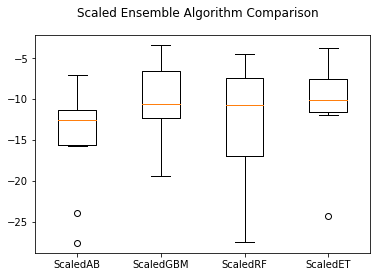

In [130]:
# Compare Algorithms 

fig = plt.figure() 
fig.suptitle('Scaled Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

It looks like Gradient Boosting has a better mean score, it also looks like Extra Trees has a similar distribution and perhaps a better median score

## Tune Ensemble Methods

The default number of boosting stages to perform (n estimators) is 100. This is a good candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting stages, the better the performance but the longer the training time

In [132]:
# Tune scaled GBM 

scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400])) 
model = GradientBoostingRegressor(random_state=seed) 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print(grid_result.best_score_, grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 

for mean, stdev, param in zip(means, stds, params):
    print(mean, stdev, param)

-9.356471017409289 {'n_estimators': 400}
-10.812166656847484 4.724393636557874 {'n_estimators': 50}
-10.040856533581554 4.441757611922483 {'n_estimators': 100}
-9.694096476883832 4.275761512537344 {'n_estimators': 150}
-9.539706349574349 4.270636952479526 {'n_estimators': 200}
-9.448764160530112 4.26260267792799 {'n_estimators': 250}
-9.429945745323828 4.2737914868636375 {'n_estimators': 300}
-9.369824156065174 4.254107667951356 {'n_estimators': 350}
-9.356471017409289 4.267836625704751 {'n_estimators': 400}


We can see that the best conﬁguration was n estimators=400 resulting in a mean squared error of -9.356471, about 0.65 units better than the untuned method.

## Finalize Model

In this section we will ﬁnalize the gradient boosting model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.


In [133]:
# prepare the model 

scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
model = GradientBoostingRegressor(random_state=seed, n_estimators=400) 
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=7,
             subsample=1.0, verbose=0, warm_start=False)

We can then scale the inputs for the validation dataset and generate predictions.

In [134]:
# transform the validation dataset

rescaledValidationX = scaler.transform(X_validation) 
predictions = model.predict(rescaledValidationX) 
print(mean_squared_error(Y_validation, predictions))

11.875252079219903


We can see that the estimated mean squared error is 11.8, close to our estimate of -9.3.